# APPLICATIONS OF MACHINE LEARNING TO ECONOMICS AND FINANCE

In [1]:
% autosave 120

Autosaving every 120 seconds


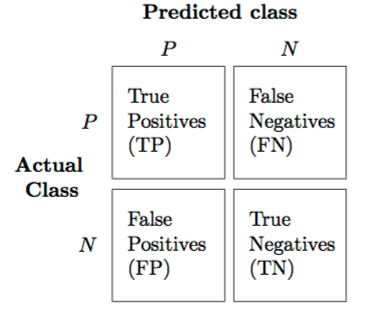

In [2]:
from IPython.display import Image 
Image(filename = "img\conf_mat.png", width = 400, height = 400)  #混淆矩陣

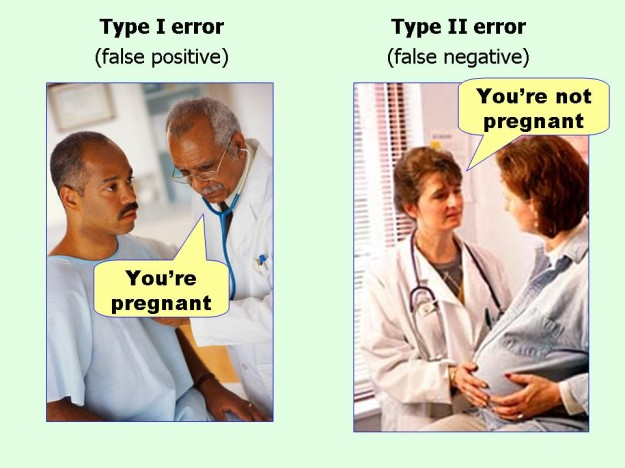

In [3]:
from IPython.display import Image 
Image(filename = "img\Type-I-and-II-errors1-625x468.jpg", width = 800, height = 800)

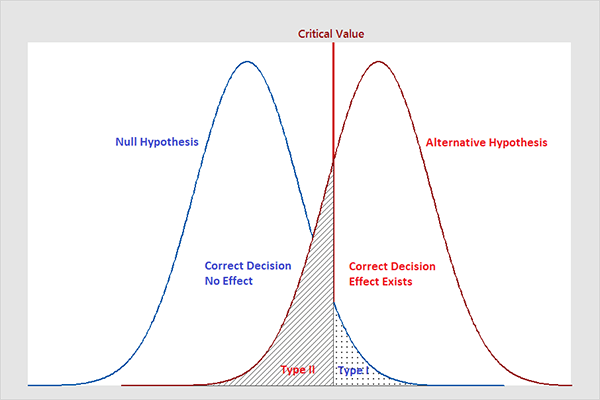

In [4]:
from IPython.display import Image 
Image(filename = "img\TypesErrorHypothesisTests.png", width = 600, height = 600)

**TP: True Positive**  <br/>
**TN: True Negative** <br/>
**FP: False Positive (Type I error)** <br/>
**FN: False Negative (Type II error)** <br/>

**Accuracy: The ratio of correctly predicted observation to the total observations** <br/>

\begin{equation*}
accuracy = \frac{TP + TN} {TP + TN + FP + FN}
\end{equation*}
<br/>

**Precision: The ratio of correctly predicted positive observations to the total predicted positive observations.** <br/>

\begin{equation*}
precision = \frac{TP} {TP + FP}
\end{equation*}
<br/>

**Recall: The ratio of correctly predicted positive observations to the all observations in actual class - yes.**

\begin{equation*}
recall = \frac {TP} {TP + FN} = sensitivity
\end{equation*}
<br/>

**F-score: The weighted average of Precision and Recall.**

\begin{equation*}
F-score = \frac {2} {\frac{1}{precision} + \frac{1}{recall}} = \frac {2(precision)(recall)} {precision + recall}
\end{equation*}
<br/>

**Specificity: The ratio of correctly predicted negative observations to the all observations in actula class - no.**

\begin{equation*}
specificity = \frac {TN} {TN + FP}
\end{equation*}

## Bias-Variance tradeoff & Cross Validation 

Cross validation is a form of model validation which attempts to improve on the basic methods of hold-out validation by leveraging subsets of our data and an understanding of the bias/variance trade-off in order to gain a better understanding of how our models will actually perform when applied outside of the data it was trained on. 

\begin{align}
Y & = \hat y + \epsilon \\
\end{align}

\begin{align}
\hat y = \hat \beta_0 + \hat \beta_1 x_1 + \hat \beta_2 x_2 + ... + \hat \beta_n x_n \\
\end{align}

\begin{align}
\epsilon^2 = E[(Y - \hat y)^2] = (E[\hat y - Y])^2 + E[(\hat y - E[\hat y])^2] + \sigma_e^2 \\
\end{align}

\begin{align}
\epsilon^2 = Bias^2 + Variance + Irreducibile Error(最不能計算出來的部分) \\
\end{align}


**Error due to Bias(偏差)**: The difference between the prediction and the actual (or correct) value. Bias measures how far off in general these models' predictions are from the actual value. <br/>

\begin{align}
Bias[\hat y] & = E[\hat y - Y] \\
\end{align}

**Error due to Variance(變異)**: The variability of a model prediction for a given data point. The variance is how much the predictions for a given point vary. <br/>

\begin{align}
Var[\hat y] & = E[(\hat y - E[\hat y])^2] \\
\end{align}

by [Fortmann-Roe's verbatim definition](http://scott.fortmann-roe.com/docs/BiasVariance.html)

[Note] $\hat y$: estimated value 

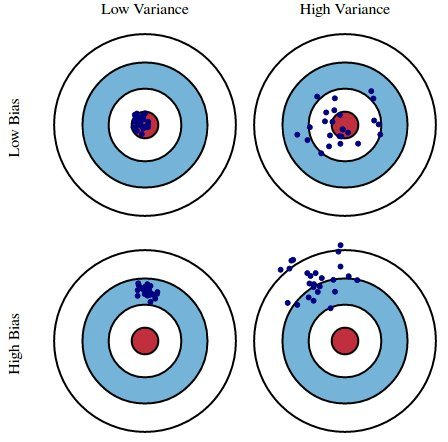

In [5]:
Image(filename = "img/bias-and-variance.jpg", width = 400, height = 400)

**Validation Curves: Training vs Test Error**

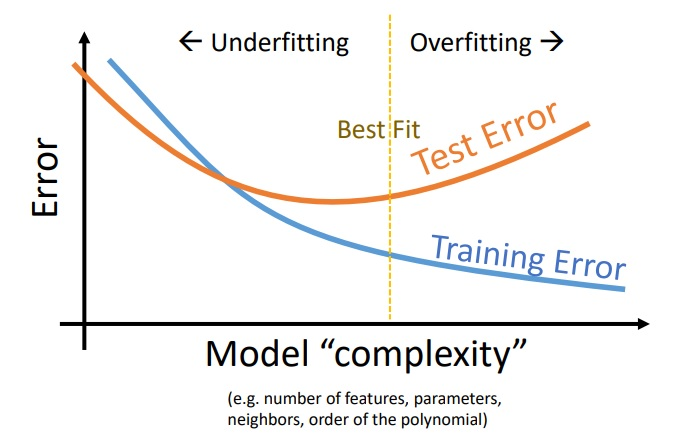

In [6]:
Image(filename = "img/bias-variance-total-error.jpg", width = 600, height = 600)

### Tradeoff
* **Bagging**: Training a bunch of individual models in a parallel way. Each model is trained by a random subset of the data.
        *This approach would reduce variance and solve overfitting. 優點是可以減少變異,解決overfitting

* **Boosting**: Training a bunch of individual models in a sequential way. Each individual model learns from mistakes made by the previous model. This approach would reduce bias.
        * 不斷調整模型參數

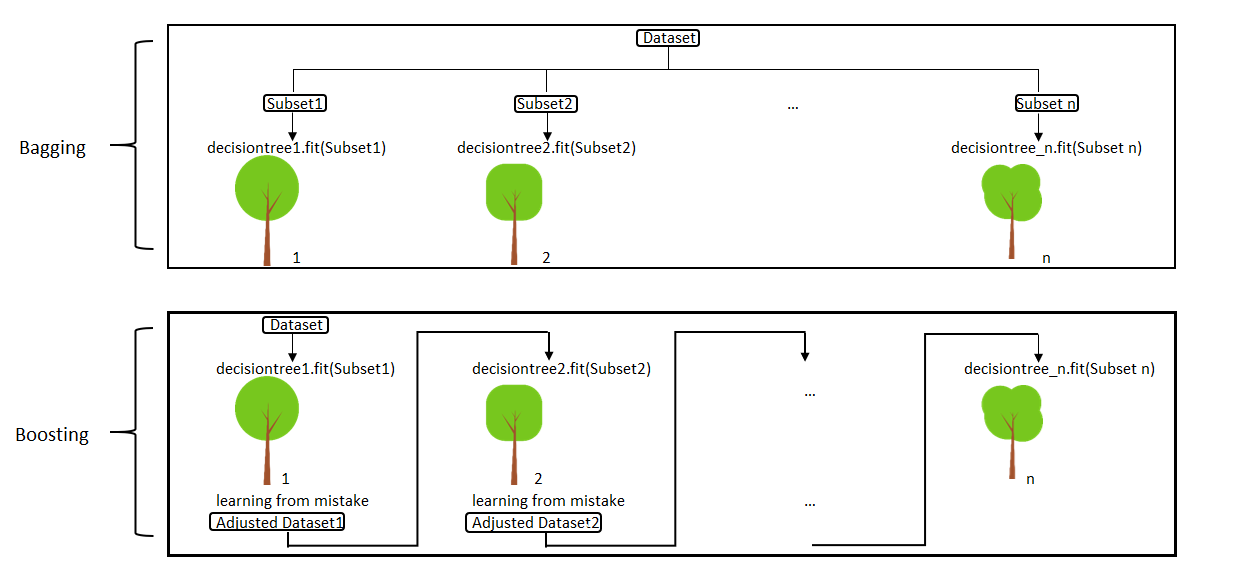

In [7]:
Image(filename = "img/1_bUySDOFp1SdzJXWmWJsXRQ.png", width = 1000, height = 600)

## Holdout Validation

Data is divided into a training data set and a test data set. (Typically between 70%-30% and 90%-10%)

* Training Data: use for fitting the model. (More for more complex models)
* Test Data: check the generalization error. (More for better estimation of the generalization error)

Method to split: temporal, random, geographical,... (usually random)

However, if we use the same test data over and over again when selecting the model, they become part of the training data. (overadaptation of the model) A better way to use dual cross-validation for model selection is to divide the data into three parts: a training data set, a validation data set, and a test data set.

It is possible and recommended to search the hyperparameter space for the best cross validation score, including `C`, `kernel` and `gamma` for Support Vector Classifier, `alpha` for Lasso, and so on.

## K-Fold Cross Validation(驗證)

The k-fold cross-validation is used in model tuning to find the optimal values of the hyper-parameters that provide an acceptable generalization capability. The training data is divided into k subsets (without substitution). This process is then repeated with each fold (group) as the validation data. This procedure is repeated k times so that we get k models and k estimates of performance. Once we have found acceptable values for the hyper-parameters, we can re-train the model with the entire data set.

**Ron Kohavi has shown with practical data that k=10 is the best compromise between bias and variance in most cases.**

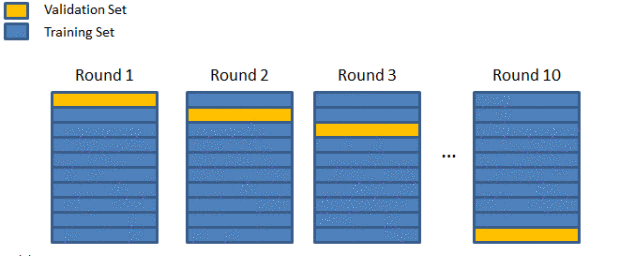

In [8]:
Image(filename = "img/cv.png", width = 600, height = 600)

## Leave One Out Cross Validation (LOOCV)

A type of K-Fold validation where k=n given n is the number of rows in the dataset.

**Only if you are dealing with very small amounts of data**

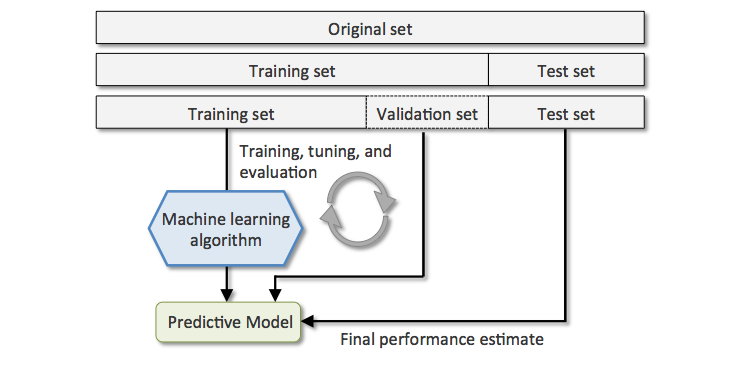

In [9]:
Image(filename = "img/1_OJVhBtg5YgeW7rKXoxKQxg.png", width = 800, height = 600)

# Example

California Housing Data

In [10]:
from sklearn import datasets
calihouses = datasets.fetch_california_housing()
calidata = calihouses.data

In [11]:
import pandas as pd
import numpy as np

In [12]:
headers = calihouses.feature_names
X = pd.DataFrame(calidata, columns=headers)
y = np.array(calihouses.target)

In [13]:
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


## Holdout

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [17]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15480, 8) (15480,)
(5160, 8) (5160,)


In [18]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [19]:
print(lm.score(X_test,y_test))

0.6139620936551216


## K-fold

In [26]:
X = np.array(X)

In [27]:
lm_k = linear_model.LinearRegression()

In [28]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lm_k, X, y, cv=10))

[0.48254494 0.61416063 0.42274892 0.48178521 0.55705986 0.5412919
 0.47496038 0.45844938 0.48177943 0.59528796]


**Reference: [Model Evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)**

# Good Job!

# Exercise

[Boston dataset in sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)


In [57]:
import pandas as pd
import numpy as np
from sklearn import datasets
boston = datasets.load_boston()


In [58]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(X.shape)

(506, 13)
